# MÔ HÌNH HỒI QUY TUYẾN TÍNH

# Học máy có nhãn (Supervised learning)

Biến độc lập $X=(X_1,X_2,\dots,X_m)$ và biến phụ thuộc $Y$

**Mục tiêu:** Dự báo biến phụ thuộc khi biết biến độc lập $Y=f(X_1,X_2,\dots,X_m)$

**Phân loại (classification)**: Biến phụ thuộc là biến phân loại (categories)

**Hồi quy (Regression)**: Biến phụ thuộc là liên tục

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

## 1. Boston housing data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/COLE/Khóa cơ bản - không gửi học viên/Week_2/Thực hành trên lớp

/content/drive/MyDrive/COLE/Khóa cơ bản - không gửi học viên/Week_2/Thực hành trên lớp


In [5]:
boston = pd.read_csv('data/Boston.csv')

In [9]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
boston=boston.drop('Unnamed: 0',axis=1)

In [10]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Cơ sở hồi quy tuyến tính

## Hồi quy tuyến tính đơn giản ( 1 biến độc lập)

$$y=\beta_0+\beta_1 x$$


- $y$: biến phụ thuộc

- $x$: biến độc lập

- $\beta_0,\beta_1$: tham số của mô hình


## Hồi quy tuyến tính nhiều chiều (nhiều biến độc lập)

Hồi quy 2 biến: $y=\beta_0+\beta_1 x_2+\beta_2 x_2$

Hồi quy $m$ biến: $y=\beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_mx_m$

- $y$: biến phụ thuộc

- $x$: biến độc lập

- $\beta_0,\beta_1,\beta_2,\dots,\beta_m$: tham số của mô hình

### Xác định giá trị của tham số mô hình

- Xác định sai số ( hàm tổn thất) của mô hình.

- Chọn tham số để sai số nhỏ nhất.

## Mô hình lý thuyết

Giả sử rằng biến phụ thuộc $Y$ (output, dependent, response) có **quan hệ tuyến tính**
với các biến đầu vào (independent, predictor) $X_1,X_2,\dots,X_m$ bởi công thức

$$ Y=\beta_0+\sum\limits_{j=1}^m \beta_j X_j+\varepsilon $$

trong đó $\varepsilon\sim N(0,\sigma^2)$ biến sai số không quan sát được (**error component**)

## Mục tiêu
Ước lượng các tham số $\beta_j$, phương sai $\sigma^2$, và sự ảnh hưởng các biến đầu vào đối với $Y$.

Giả sử ta có các $n$ quan sát $$(x_{i1},\dots,x_{im},y_i), i=1,2,\dots,n $$

$$y_i=\beta_0+\sum\limits_{j=1}^m \beta_j x_{ij}+e_i, i=1,2,\dots,n $$

với các $e_i$ là các sai số và cùng phân phối với $\varepsilon$

Ta sử dụng phương pháp **bình phương tối thiểu** ước lượng các $\beta_j$ sao cho sai số nhỏ nhất
$$SSE=\sum\limits_{i=1}^ne_i^2=\sum\limits_{i=1}^n (y_i-\beta_0-\sum\limits_{j=1}^m \beta_j x_{ij})^2 $$
$$\hat{\beta} =\arg\min SSE(\beta)$$

Tổng bình phương các sai số (SSE): $$SSE=\sum\limits_{i=1}^n \hat{e}_i^2=ESS(\hat{\beta}) $$
Hệ số $R^2$, $$ R^2=1-\dfrac{SSE}{SST}=1-\dfrac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{\sum\limits_{i=1}^n (y_i-\bar{y})^2}$$

## Thực hành với dữ liệu Boston

In [11]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
y = boston['medv'].values
x = boston.drop('medv',axis=1).values

### Dự báo giá nhà dựa vào một biến

In [15]:
# xrm=boston['rm']
xrm = x[:, 5]

In [16]:
xrm = xrm.reshape(-1, 1)
y = y.reshape(-1, 1)

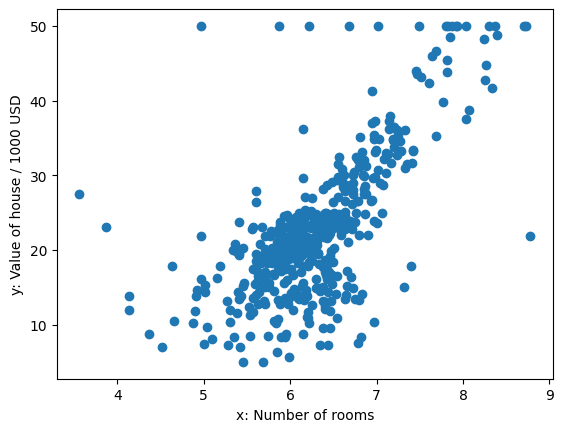

In [17]:
import matplotlib.pyplot as plt
plt.scatter(xrm,y)
plt.ylabel("y: Value of house / 1000 USD")
plt.xlabel("x: Number of rooms")
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()
reg.fit(xrm, y)

LinearRegression()

In [21]:
# Hệ số R^2
reg.score(xrm, y)

0.48352545599133423

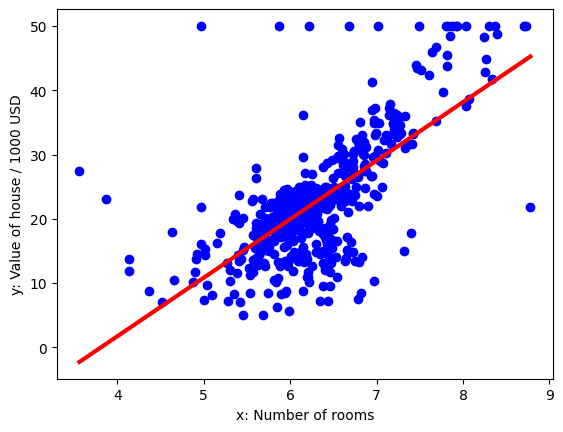

In [22]:
xx=np.linspace(min(xrm),max(xrm)).reshape(-1,1)
plt.scatter(xrm,y,color="blue")
plt.plot(xx,reg.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Value of house / 1000 USD")
plt.xlabel("x: Number of rooms")
plt.show()

In [23]:
# !pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot

In [24]:
visualizer = ResidualsPlot(reg, hist=False)

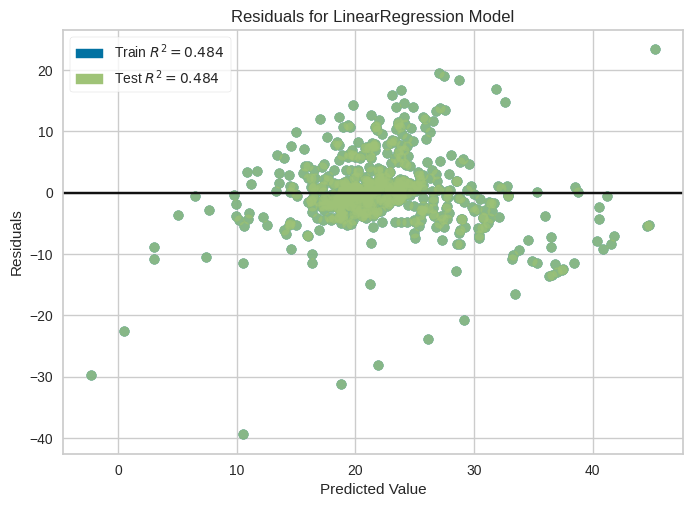

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [25]:
visualizer.fit(xrm, y)  # Fit the training data to the model
visualizer.score(xrm, y)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

## Dự báo giá nhà dựa vào tất cả các biến

In [26]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Ta chia dữ liệu làm 2 phần: training( 70%) và testing (30%)**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state=42)

In [29]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred=reg.predict(x_test)

In [31]:
# Hệ số R^2
reg.score(x_train,y_train)

0.7434997532004697

In [32]:
from yellowbrick.regressor import ResidualsPlot
viz = ResidualsPlot(reg, hist=False)

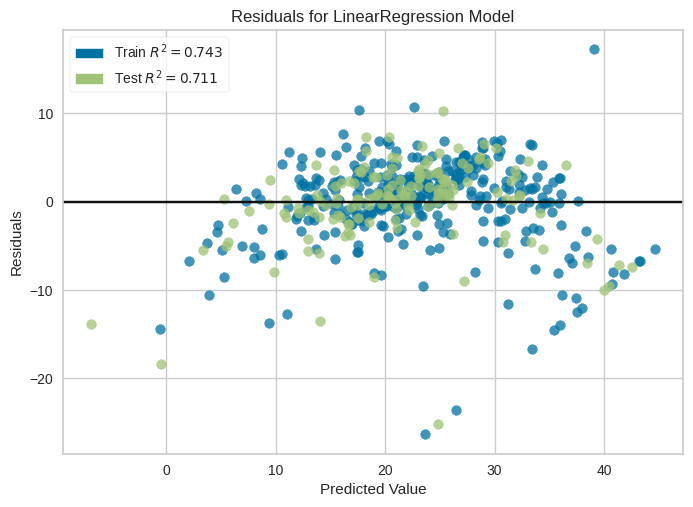

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [33]:
viz.fit(x_train, y_train)  # Fit the training data to the model
viz.score(x_test, y_test)  # Evaluate the model on the test data
viz.poof()

## Kiểm tra độ chính xác của mô hình
- Thông thường ta chia dữ liệu thành hai tập: **tập huấn luyện** và **tập kiểm tra**. Khi xây dựng mô hình ta không được lấy tập kiểm tra để sử dụng.
- Trong tập huấn luyện ta trích một phần dữ liệu huấn luyện gọi là tập **validation**. Mô hình được kiểm tra thông quan tập validation trên.
- Vấn đề chọn kích thước tập validation?

## Phương pháp cross-validation
- Chia tập huấn luyện thành $k$ tập con (cùng kích thước), rời nhau.
- Mỗi lần kiểm tra thử, huấn luyện mô hình với $k-1$ tập và dùng tập còn lại là tập validation.
- Mô hình cuối cùng được lựa chọn dựa trên sai số huấn luyện và sai số của tập validation.

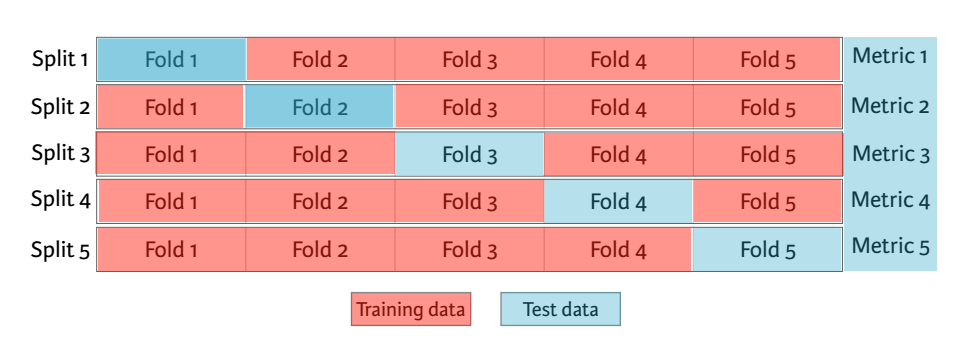

In [34]:
from IPython.display import Image
Image('cross-validation.png')

** Nhược điểm**
- Phương pháp của phương pháp cross-validation là số lần thử nghiệm tỷ lệ với số tập chia nhỏ $K$.
- Người ta đưa ra phương pháp hiệu chỉnh (tránh huấn luyện quá khớp):
    - Dừng sớm
    - Thêm số hạng vào hàm mất mát

# Hiệu chỉnh mô hình hồi quy (Regularized regression)

- Hồi quy tuyến tính cực tiểu hóa hàm tổn thất (loss function)

- Nếu chọn tất cả các biến độc lập

- Các biến độc lập lớn nên các hệ số lớn dẫn đến overfitting

- Hiệu chỉnh: Đưa thêm phần hiệu chỉnh các hệ số.

## Ridge Regression

- Hàm tổn thất $$L(\beta)=\sum\limits_{i=1}^n (y_i-\beta_0-\sum\limits_{j=1}^m \beta_j x_{ij})^2+\alpha\sum\limits_{j=0}^m \beta_j^2 $$

- $\alpha$: tham số (cần được xác định)

- Nếu $\alpha=0$: Ta có hồi quy thông thường

- Nếu $\alpha$ lớn: Có thể dẫn tới underfitting

In [35]:
from sklearn.linear_model import Ridge

In [36]:
ridge = Ridge(alpha=0.1)

In [37]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [38]:
# Hệ số R^2
ridge.score(x_train,y_train)

0.7434382188771707

In [39]:
ridge_pred = ridge.predict(x_test)

In [40]:
ridge.score(x_test, y_test)

0.710317820639133

In [41]:
import matplotlib.pyplot as plt

In [42]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

In [44]:
alphas = np.logspace(-10, 1, 400)

In [45]:
alphas

array([1.00000000e-10, 1.06553795e-10, 1.13537112e-10, 1.20978102e-10,
       1.28906759e-10, 1.37355044e-10, 1.46357012e-10, 1.55948950e-10,
       1.66169525e-10, 1.77059935e-10, 1.88664080e-10, 2.01028738e-10,
       2.14203749e-10, 2.28242224e-10, 2.43200751e-10, 2.59139630e-10,
       2.76123110e-10, 2.94219653e-10, 3.13502206e-10, 3.34048498e-10,
       3.55941352e-10, 3.79269019e-10, 4.04125533e-10, 4.30611093e-10,
       4.58832461e-10, 4.88903400e-10, 5.20945127e-10, 5.55086803e-10,
       5.91466054e-10, 6.30229527e-10, 6.71533479e-10, 7.15544407e-10,
       7.62439721e-10, 8.12408458e-10, 8.65652043e-10, 9.22385104e-10,
       9.82836333e-10, 1.04724941e-09, 1.11588399e-09, 1.18901674e-09,
       1.26694246e-09, 1.34997528e-09, 1.43844989e-09, 1.53272295e-09,
       1.63317447e-09, 1.74020937e-09, 1.85425913e-09, 1.97578347e-09,
       2.10527227e-09, 2.24324750e-09, 2.39026535e-09, 2.54691844e-09,
       2.71383825e-09, 2.89169765e-09, 3.08121359e-09, 3.28315001e-09,
      

In [46]:
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)

In [47]:
y_train=y_train.ravel()

In [48]:
y_train.shape

(354,)

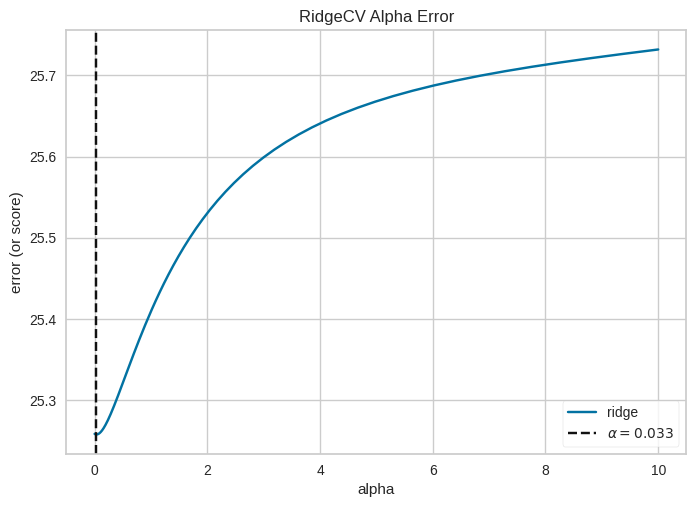

<Axes: title={'center': 'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [49]:
visualizer.fit(x_train, y_train)
visualizer.poof()

## Lasso regression

- Hàm tổn thất $$L(\beta)=\sum\limits_{i=1}^n (y_i-\beta_0-\sum\limits_{j=1}^m \beta_j x_{ij})^2+\alpha\sum\limits_{j=0}^m |\beta_j| $$

- $\alpha$: tham số (cần được xác định)


In [50]:
from sklearn.linear_model import Lasso

In [51]:
lasso = Lasso(alpha=0.1)

In [52]:
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
lasso.score(x_test, y_test)

0.6918147952283057

In [53]:
import matplotlib.pyplot as plt

In [54]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

In [55]:
alphas = np.logspace(-10, 1, 400)

In [56]:
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

In [57]:
y_train=y_train.ravel()

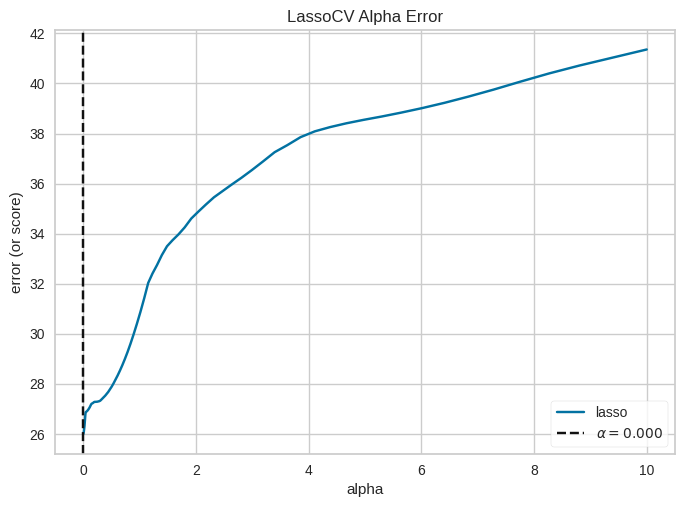

In [58]:
visualizer.fit(x_train, y_train)
g = visualizer.poof()

## Lasso regression for feature selection

In [59]:
names = boston.columns.values
names

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'], dtype=object)

In [60]:
names=names[0:2]

In [61]:
names

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'], dtype=object)

In [62]:
lasso_coef=lasso.fit(x,y).coef_
len(lasso_coef)

13

In [ ]:
len(names)

13

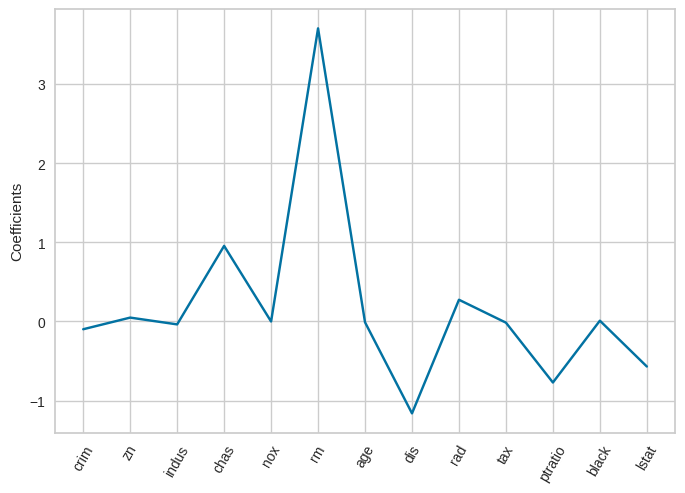

In [63]:
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.show()

# Hồi quy dựa vào K lân cận gần nhất (Kneighbors)

Cho tập huấn luyện $(x_i,y_i)$. Dự báo giá trị tại mẫu $x$.

- Tìm $k$ lân cận gần nhất với $x$ từ mẫu $x_i$ của tập huấn luyện

- Ký hiệu $N(x)=\{x_{i_1},\dots,x_{i_k}\}$ là tập mẫu tìm được

- Giá trị dự báo của $x$ là $y=f(x)=Average(y_i: x_i\in N(x))$

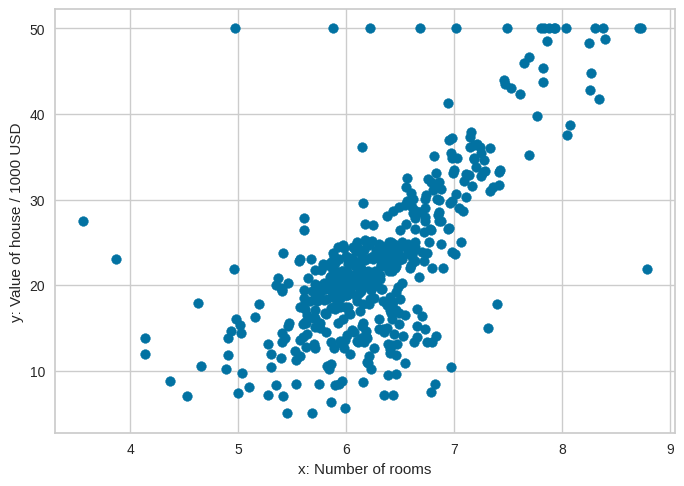

In [64]:
plt.scatter(xrm,y)
plt.ylabel("y: Value of house / 1000 USD")
plt.xlabel("x: Number of rooms")
plt.show()

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
reg = KNeighborsRegressor(n_neighbors=1)

In [67]:
reg.fit(xrm, y)

KNeighborsRegressor(n_neighbors=1)

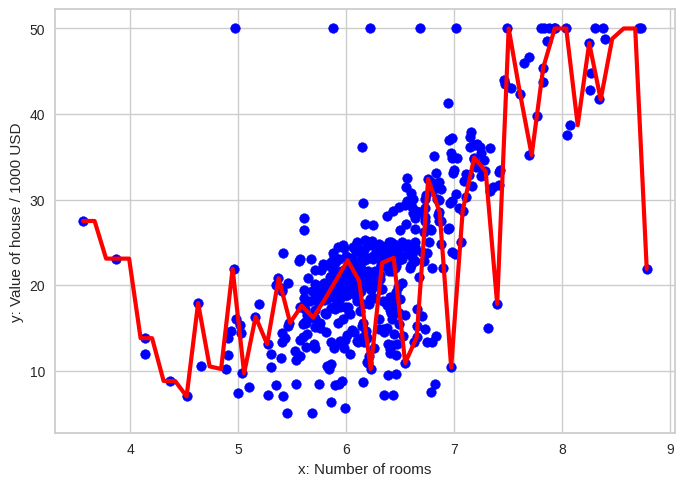

In [71]:
xx=np.linspace(min(xrm),max(xrm)).reshape(-1,1)
plt.scatter(xrm,y,color="blue")
plt.plot(xx,reg.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Value of house / 1000 USD")
plt.xlabel("x: Number of rooms")
plt.show()

In [72]:
print("Test set R^2: {:.2f}".format(reg.score(xrm, y)))

Test set R^2: 0.90


In [73]:
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(xrm, y)

KNeighborsRegressor()

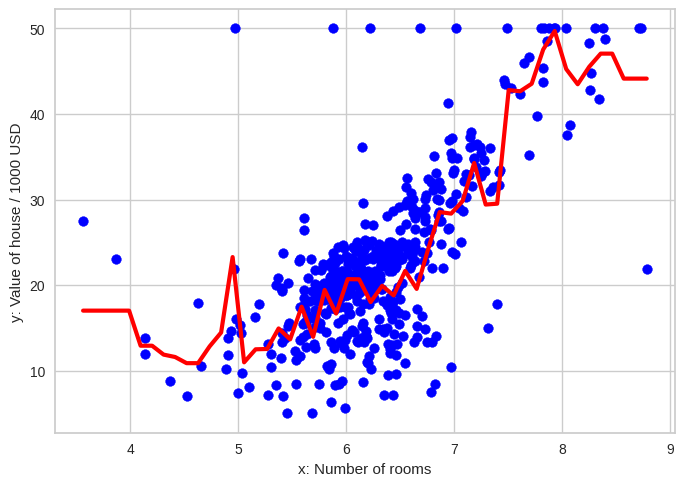

In [74]:
xx=np.linspace(min(xrm),max(xrm)).reshape(-1,1)
plt.scatter(xrm,y,color="blue")
plt.plot(xx,reg.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Value of house / 1000 USD")
plt.xlabel("x: Number of rooms")
plt.show()

## Lựa chọn số $k$ tốt nhất

In [75]:
from sklearn.model_selection import GridSearchCV

In [78]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [79]:
reg = KNeighborsRegressor()

In [80]:
model = GridSearchCV(reg, params, cv=5)
model.fit(xrm,y)
model.best_params_

{'n_neighbors': 9}

In [82]:
reg = KNeighborsRegressor(n_neighbors=9)
reg.fit(xrm, y)

KNeighborsRegressor(n_neighbors=9)

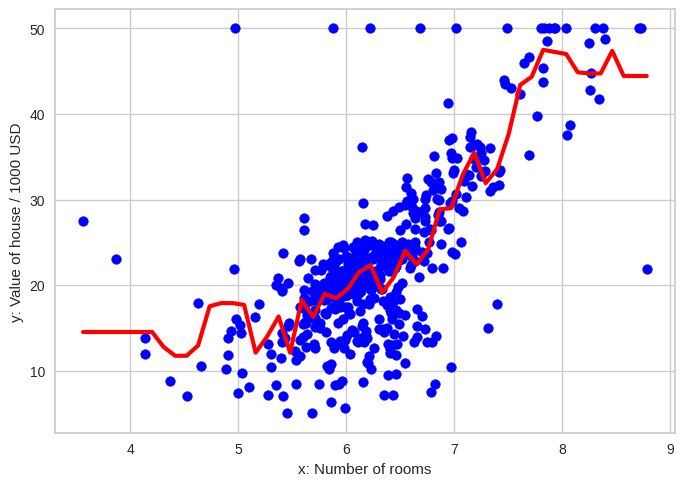

In [83]:
xx = np.linspace(min(xrm),max(xrm)).reshape(-1,1)
plt.scatter(xrm,y,color="blue")
plt.plot(xx,reg.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Value of house / 1000 USD")
plt.xlabel("x: Number of rooms")
plt.show()

## Dự báo giá nhà với tất cả các biến

In [84]:
reg = KNeighborsRegressor(n_neighbors = 3)

In [85]:
reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [86]:
reg_pred = reg.predict(x_test)

In [87]:
reg.score(x_test, y_test)

0.6222229853585531

# Dự đoán giá bất động sản

## 2. Bài toán dự đoán giá bất động sản Montreal

Dự báo giá nhà dựa trên các thông tin thông tin quan trọng về nhà. Dựa vào các mô hình hồi quy tuyến tính, hồi quy tuyến tính Ridge, hồi quy Laso, và hồi quy k lân cận gần nhất.

## Dữ liệu

In [88]:
import pandas as pd
data=pd.read_csv("data/final_dataDec.csv")

In [89]:
data.head()

,not_sold,2014,2013,2012,2011,2010,2009,2008,2007,2006,...,emergency_shelters,emergency_water,Facilities,fire_stations,Cultural,Monuments,police_stations,Vacant,Free_Parking,askprice
0,1,0,0,0,0,0,0,0,0,0,...,37,274,210,43,71,43,25,43,52,166000
1,1,0,0,0,0,0,0,0,0,0,...,19,120,1,15,24,5,7,0,4,349000
2,1,0,0,0,0,0,0,0,0,0,...,27,191,155,28,54,32,18,19,43,224900
3,1,0,0,0,0,0,0,0,0,0,...,10,82,0,13,10,2,5,0,1,585000
4,1,0,0,0,0,0,0,0,0,0,...,30,238,216,37,66,42,20,43,52,312900


In [90]:
features=data.columns.values

In [91]:
data.shape

(9717, 40)

## Xử lý dữ liệu với các giá trị missing
- Loại bỏ các bản ghi có giá trị missing
- Khôi phục giá trị mising bằng giá trị trung bình

In [ ]:
len(features)

40

In [ ]:
features[0] # Thuộc tính not_sold, 1 chưa bán, 0 đã bán

'not_sold'

In [ ]:
features[1:14]# Các thuộc tính bán năm 2002-> 2014: 1 năm bán

array(['2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007',
       '2006', '2005', '2004', '2003', '2002'], dtype=object)

In [ ]:
features[14:16]# Số giường, năm xây dựng

array(['num_bed', 'year_built'], dtype=object)

In [ ]:
features[16:18]# Tọa độ

array(['longitude', 'latitude'], dtype=object)

In [ ]:
features[18:21]# Số phòng, số phòng tắm, diện tích

array(['num_room', 'num_bath', 'living_area'], dtype=object)

In [ ]:
features[21:26]# Tính chất bất động sản

array(['house', 'plex', 'chalet', 'loft', 'condo'], dtype=object)

In [ ]:
features[26:30]

array(['num_parking', 'accessible_buildings', 'family_quality',
       'art_expos'], dtype=object)

In [ ]:
features[30:35]

array(['emergency_shelters', 'emergency_water', 'Facilities',
       'fire_stations', 'Cultural'], dtype=object)

In [ ]:
features[35:39]

array(['Monuments', 'police_stations', 'Vacant', 'Free_Parking'],
      dtype=object)

In [ ]:
features[39] # Giá tài sản

'askprice'

Các biến phụ thuộc **39**, biến dự báo **1**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
#from sklearn.select_model import cross_validation
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import normalize

In [ ]:
def loadData(filename):
	data = np.genfromtxt(filename, delimiter=',', dtype=float, skip_header=1)
	return data

In [ ]:
data=loadData("data/final_dataDec.csv")

In [ ]:
def remove_missing_data(pX_train, feature_to_impute):
    X_train =  np.copy(pX_train)
    for i in range(X_train.shape[0]-1, 0, -1):
        for j in range(0, X_train.shape[1], 1):
            if feature_to_impute[j] != 0 and X_train[i, j] == 0:
                X_train = np.delete(X_train, i, 0)
                break
    return X_train

In [ ]:
impute = np.array([0] * len(data[0]))
impute[14] = 2 # num_bed
impute[15] = 2 # year_built
impute[18] = 2 # num_room
impute[19] = 2 # num_bath
impute[20] = 1 # living_space

In [ ]:
data_removal=remove_missing_data(data,impute)

In [ ]:
data_removal.shape

(2289, 40)

In [ ]:
def mean_imputation_pure(pX_train, feature_to_impute):
	X_train =  np.copy(pX_train)
	for i in range(0, len(feature_to_impute)):
		if feature_to_impute[i] == 0:
			continue
		non_zeros = 0
		for j in range(0, X_train.shape[0]):
			if X_train[j, i] != 0:
				non_zeros += 1
		mean = np.sum(X_train[:, i])/float(non_zeros)
		for j in range(0, X_train.shape[0]):
			if X_train[j, i] == 0:
				X_train[j, i] = mean
	return X_train

In [ ]:
data_imputation=mean_imputation_pure(data,impute)

In [ ]:
data_imputation.shape

(9717, 40)

### Dự báo giá nhà với dữ liệu data_removal (bỏ các bản ghi lỗi)
- Dữ liệu data_removal
- Chia dữ liệu thành dữ liệu huấn luyện (70%) và dữ liệu kiểm tra (30%)

In [ ]:
xrm=data_removal[:,:39]## Biến độc lập
yrm=data_removal[:,39] # Biến phụ thuộc

In [ ]:
from sklearn.model_selection import train_test_split
xrm_train, xrm_test, yrm_train, yrm_test = train_test_split(xrm, yrm,test_size = 0.3, random_state=42)

** Hồi quy tuyến tính **

In [ ]:
reg_rm=LinearRegression()
reg_rm.fit(xrm_train,yrm_train)

LinearRegression()

In [ ]:
reg_rm.score(xrm_train,yrm_train)# R^2

0.7171069633019626

In [ ]:
mean_absolute_error(yrm_test,reg_rm.predict(xrm_test))# MAE=sum |y_i-y(x_i)|

44851.14737991266

**Hồi quy phi tuyến K lân cận gần nhất**

In [ ]:
knnreg_rm = KNeighborsRegressor(n_neighbors=50)
knnreg_rm.fit(xrm_train, yrm_train)

KNeighborsRegressor(n_neighbors=50)

In [ ]:
knnreg_rm.score(xrm_train, yrm_train)

0.5803989704644179

In [ ]:
mean_absolute_error(yrm_test,knnreg_rm.predict(xrm_test))

50992.512663755464

In [ ]:
mae=[]
for k in range(1,50):
    reg=KNeighborsRegressor(n_neighbors=k)
    reg.fit(xrm_train,yrm_train)
    error=mean_absolute_error(yrm_test,reg.predict(xrm_test))
    mae.append(error)

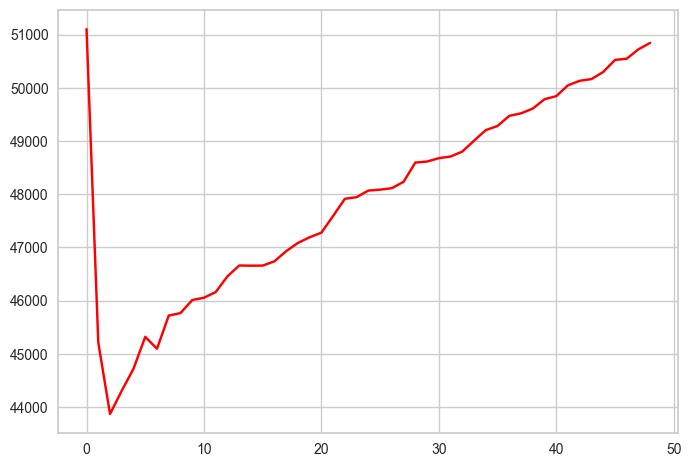

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mae,c='red')
plt.show()

In [ ]:
print("Optimal k: ", np.argmin(mae)+1)

Optimal k:  3
